In [ ]:
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install sklearn
# !pip install scikit-learn
# !pip install streamlit
# !pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


You should consider upgrading via the 'F:\Techsaksham-AICTE Internship\.ven\Scripts\python.exe -m pip install --upgrade pip' command.


In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
# Load Data
calories = pd.read_csv("calories.csv")
exercise = pd.read_csv("exercise.csv")
exercise_df = exercise.merge(calories, on="User_ID")
exercise_df.drop(columns="User_ID", inplace=True)

# Feature Engineering
exercise_df["BMI"] = round(exercise_df["Weight"] / ((exercise_df["Height"] / 100) ** 2), 2)

# One-Hot Encoding for Gender
exercise_df = pd.get_dummies(exercise_df, drop_first=True)

# Define X and y
X = exercise_df.drop("Calories", axis=1)
y = exercise_df["Calories"]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [27]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=1000, max_depth=6, random_state=1),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, max_depth=3, random_state=1),
    "AdaBoost Regressor": AdaBoostRegressor(n_estimators=500, learning_rate=0.1, random_state=1),
    "Support Vector Regressor": SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree Regressor": DecisionTreeRegressor(max_depth=5, random_state=1)
}

In [28]:
results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        "Model": model_name,
        "MAE": round(mae, 2),
        "MSE": round(mse, 2),
        "R2_Score": round(r2 * 100, 2)
    })

# Show Results
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="R2_Score", ascending=False)
print(results_df)

                         Model    MAE      MSE  R2_Score
5  Gradient Boosting Regressor   1.39     3.78     99.91
8          K-Nearest Neighbors   5.28    54.20     98.65
4      Random Forest Regressor   5.64    69.36     98.27
0            Linear Regression   8.19   130.49     96.75
1             Ridge Regression   8.19   130.49     96.75
2             Lasso Regression   8.20   131.19     96.73
3                   ElasticNet   8.38   136.03     96.61
6           AdaBoost Regressor   9.60   146.98     96.34
9      Decision Tree Regressor   9.10   164.62     95.90
7     Support Vector Regressor  22.02  1119.75     72.11


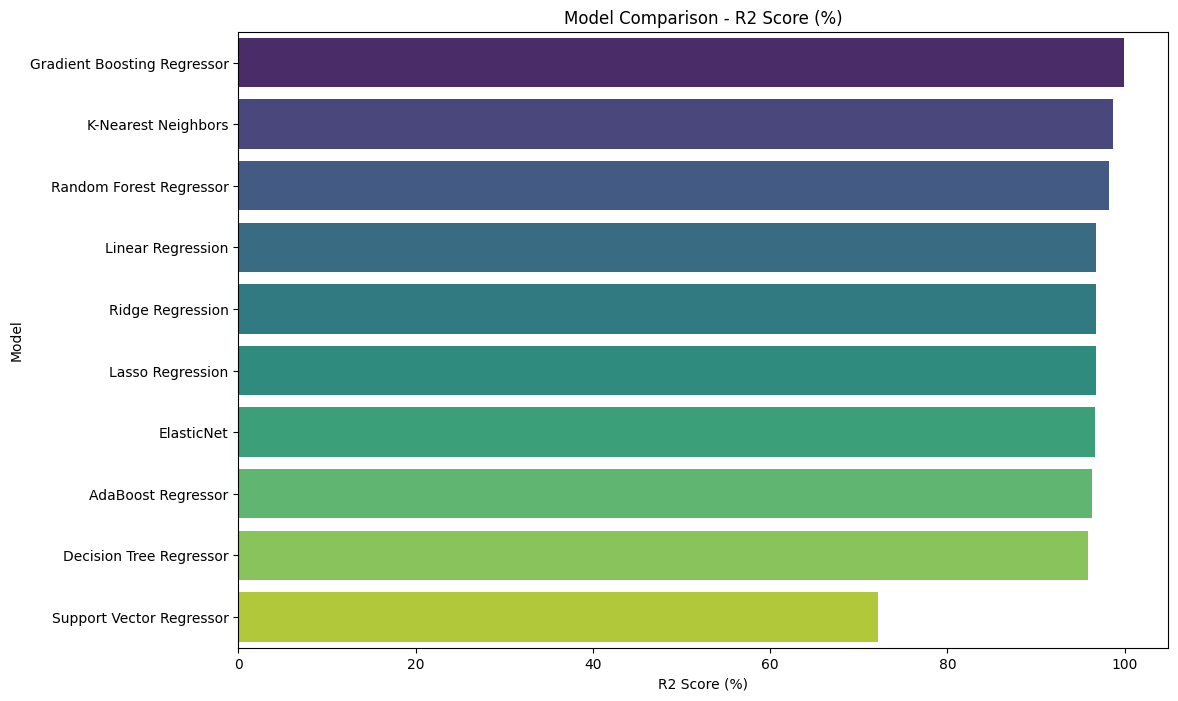

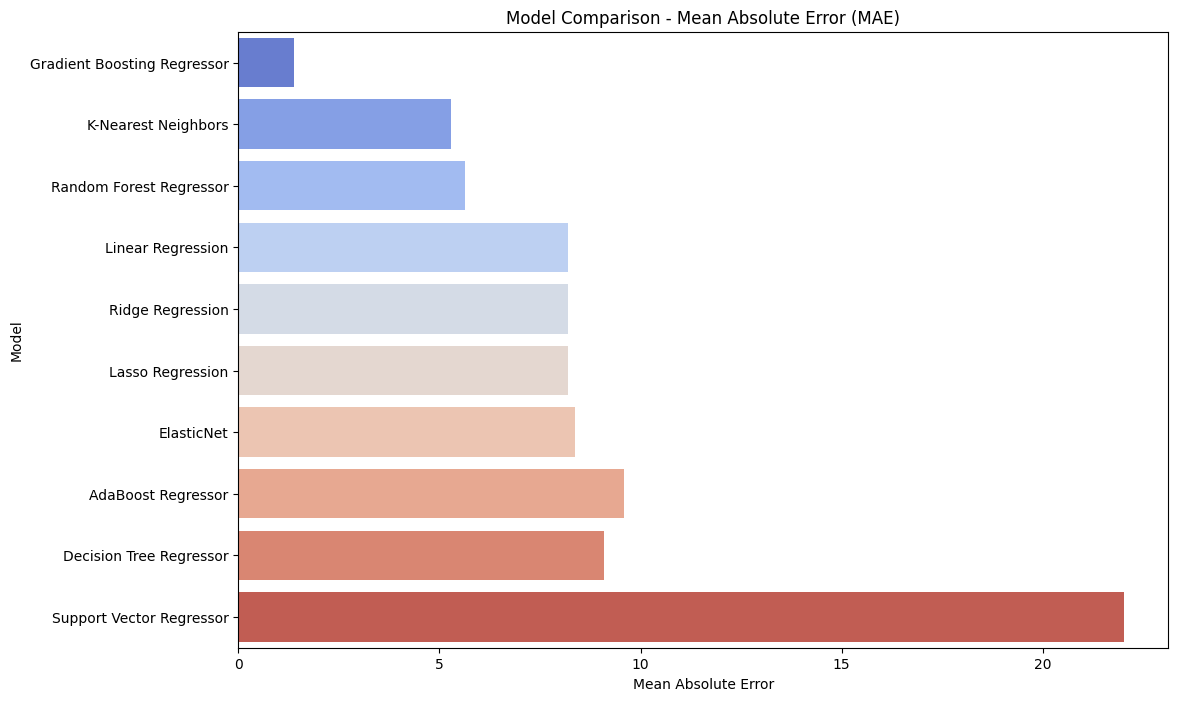

In [36]:
%matplotlib inline
# Plot Model Comparison - R2 Score
plt.figure(figsize=(12, 8))
sns.barplot(x="R2_Score", y="Model", data=results_df, hue="Model", legend=False, palette="viridis")
plt.title("Model Comparison - R2 Score (%)")
plt.xlabel("R2 Score (%)")
plt.ylabel("Model")
plt.show(block=True)  # Use block=True to display properly in some environments

# Plot MAE for Comparison
plt.figure(figsize=(12, 8))
sns.barplot(x="MAE", y="Model", data=results_df, hue="Model", legend=False, palette="coolwarm")
plt.title("Model Comparison - Mean Absolute Error (MAE)")
plt.xlabel("Mean Absolute Error")
plt.ylabel("Model")
plt.show()
